In [1]:
__version__ = '1.0.0-rc'
__author__ = 'Martino Pulici'

In [2]:
import pandas as pd
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling

from spotify_audio_features.functions import *

In [3]:
BINS = 4

In [4]:
df = pd.read_csv("georgieva_suta_burton_data.csv", sep=',')
df = df.rename(columns={'Label': 'Chart'})

for label in ['Artist', 'Track', 'Month', 'Key', 'Mode']:
    del df[label]
    
for label in [
    'Danceability',
    'Valence',
    'Acousticness',
    'Loudness',
    'Instrumentalness',
    'Year',
    'Energy',
    'Tempo',
    'Liveness',
        'Speechiness']:
    df[label] = pd.cut(df[label], BINS, labels=range(BINS))

In [5]:
model = BayesianModel([('Danceability', 'Valence'),
                       ('Acousticness', 'Loudness'),
                       ('Instrumentalness', 'Loudness'),
                       ('Year', 'Loudness'),
                       ('Energy', 'Valence'),
                       ('Tempo', 'Energy'),
                       ('Liveness', 'Energy'),
                       ('Liveness', 'Speechiness'),
                       ('Loudness', 'Energy'),
                       ('Loudness', 'Chart'),
                       ('Speechiness', 'Danceability'),
                       ('Danceability', 'Chart'),
                       ('ArtistScore', 'Chart'),
                       ])
model.fit(df)

if not model.check_model():
    print("Incorrect model!")

In [6]:
cpd = model.get_cpds('Danceability')
print(cpd)

+-----------------+---------------------+---------------------+----------------+---------------------+
| Speechiness     | Speechiness(0)      | Speechiness(1)      | Speechiness(2) | Speechiness(3)      |
+-----------------+---------------------+---------------------+----------------+---------------------+
| Danceability(0) | 0.05159958720330237 | 0.01818181818181818 | 0.0625         | 0.0                 |
+-----------------+---------------------+---------------------+----------------+---------------------+
| Danceability(1) | 0.26418988648090813 | 0.11272727272727273 | 0.125          | 0.30434782608695654 |
+-----------------+---------------------+---------------------+----------------+---------------------+
| Danceability(2) | 0.5080839353285174  | 0.4109090909090909  | 0.6875         | 0.5217391304347826  |
+-----------------+---------------------+---------------------+----------------+---------------------+
| Danceability(3) | 0.1761265909872721  | 0.4581818181818182  | 0.125    

In [7]:
print(model.is_active_trail('Danceability', 'Energy'))
print(model.is_active_trail('Danceability', 'Energy', observed='Speechiness'))

True
False


In [8]:
print(model.get_markov_blanket('Danceability'))

['Speechiness', 'ArtistScore', 'Loudness', 'Energy', 'Chart', 'Valence']


In [9]:
print(model.is_active_trail('Danceability', 'Liveness'))
print(model.is_active_trail('Danceability', 'Liveness', observed=model.get_markov_blanket('Danceability')))

True
False


In [10]:
exact_inference = VariableElimination(model)
approximate_inference = BayesianModelSampling(model)

In [11]:
VARIABLE = 'Valence'
EVIDENCE_1 = {'Chart': 1}
EVIDENCE_2 = {'Chart': 0}

In [12]:
exact(exact_inference, VARIABLE, EVIDENCE_1)

P(Valence | Chart=1) – Exact inference
+------------+----------+
| Valence(0) | 0.14292  |
+------------+----------+
| Valence(1) | 0.273746 |
+------------+----------+
| Valence(2) | 0.334399 |
+------------+----------+
| Valence(3) | 0.248935 |
+------------+----------+


In [13]:
rejection(approximate_inference, VARIABLE, EVIDENCE_1)

Generating for node: Valence: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 12.41it/s]


P(Valence | Chart=1) – Rejection sampling (10000 samples)
+------------+--------+
| Valence(0) | 0.1479 |
+------------+--------+
| Valence(1) | 0.2705 |
+------------+--------+
| Valence(2) | 0.3307 |
+------------+--------+
| Valence(3) | 0.2509 |
+------------+--------+


In [14]:
weighted(approximate_inference, VARIABLE, EVIDENCE_1)

P(Valence | Chart=1) – Likelihood weighted sampling (10000 samples)
+------------+----------+
| Valence(0) | 0.143089 |
+------------+----------+
| Valence(1) | 0.278682 |
+------------+----------+
| Valence(2) | 0.339223 |
+------------+----------+
| Valence(3) | 0.239005 |
+------------+----------+


In [15]:
exact(exact_inference, VARIABLE, EVIDENCE_2)

P(Valence | Chart=0) – Exact inference
+------------+----------+
| Valence(0) | 0.223414 |
+------------+----------+
| Valence(1) | 0.295225 |
+------------+----------+
| Valence(2) | 0.290394 |
+------------+----------+
| Valence(3) | 0.190966 |
+------------+----------+


In [17]:
sizes, exact_results, rejection_results, weighted_results = graph_points(
    exact_inference, approximate_inference, VARIABLE, EVIDENCE_1)

Generating for node: Valence: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 50.14it/s]


Generating for node: Valence: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 51.48it/s]


Generating for node: Valence: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 14.65it/s]


Generating for node: Valence: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.98it/s]


Generating for node: Valence: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.07it/s]


P(Valence | Chart=1) – Probabilities comparison


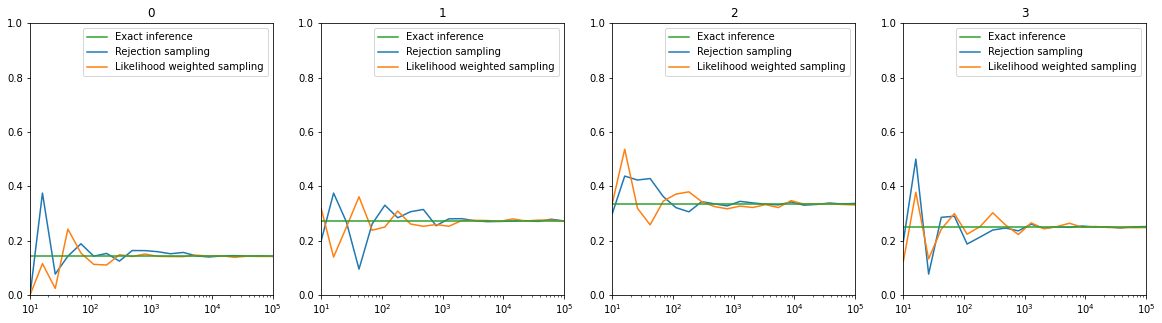

In [18]:
graph(
    sizes,
    exact_results,
    rejection_results,
    weighted_results,
    VARIABLE,
    EVIDENCE_1)

P(Valence | Chart=1) – Differences comparison


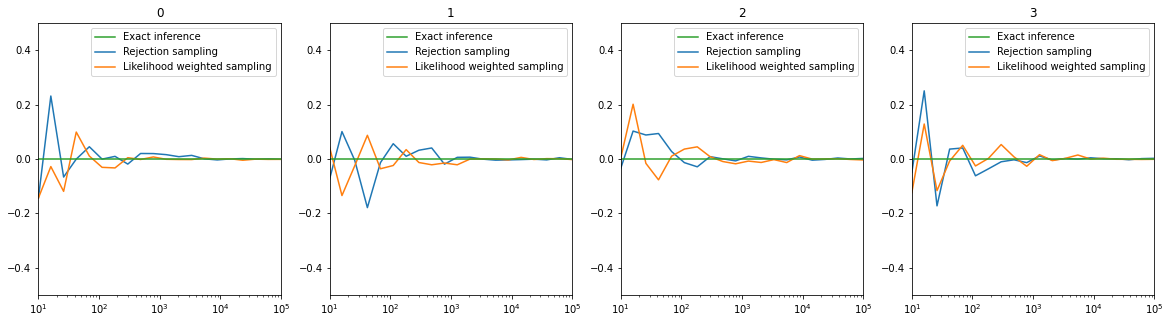

In [19]:
diff_graph(
    sizes,
    exact_results,
    rejection_results,
    weighted_results,
    VARIABLE,
    EVIDENCE_1)